In [1]:
from langgraph.graph import StateGraph, START, MessagesState
from langgraph.checkpoint.memory import InMemorySaver
from dotenv import load_dotenv

from langchain_openai import ChatOpenAI
from langchain_core.messages.utils import trim_messages,count_tokens_approximately

In [6]:
load_dotenv()

True

In [7]:
model = ChatOpenAI()

In [4]:
MAX_TOKENS = 150

In [5]:
def call_model(state: MessagesState):
    
    # Trim conversation history -> last N messages that fit within the token budget
    messages = trim_messages(
        state["messages"],
        strategy="last",                      
        token_counter=count_tokens_approximately,
        max_tokens=MAX_TOKENS
    )

    print('Current Token Count ->', count_tokens_approximately(messages=messages))

    for message in messages:
        print(message.content)

    response = model.invoke(messages)

    return {"messages": [response]}

In [8]:
builder = StateGraph(MessagesState)
builder.add_node("call_model", call_model)
builder.add_edge(START, "call_model")

In [9]:
checkpointer = InMemorySaver()
graph = builder.compile(checkpointer=checkpointer)

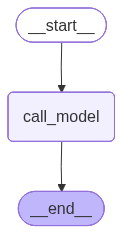

In [10]:
graph

In [11]:
config = {"configurable": {"thread_id": "chat-1"}}

result = graph.invoke(
    {"messages": [{"role": "user", "content": "Hi, my name is Nitish."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 10
Hi, my name is Nitish.


'Hello Nitish, nice to meet you! How can I assist you today?'

In [12]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "I am learning LangGraph."}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 40
Hi, my name is Nitish.
Hello Nitish, nice to meet you! How can I assist you today?
I am learning LangGraph.


"That's great! LangGraph is a powerful tool for analyzing and visualizing language data. If you have any questions or need help with anything related to LangGraph, feel free to ask. I'm here to help!"

In [13]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "Can you explain short term memory?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 108
Hi, my name is Nitish.
Hello Nitish, nice to meet you! How can I assist you today?
I am learning LangGraph.
That's great! LangGraph is a powerful tool for analyzing and visualizing language data. If you have any questions or need help with anything related to LangGraph, feel free to ask. I'm here to help!
Can you explain short term memory?


'Short-term memory, also known as working memory, is a system in the brain that temporarily holds and manipulates information for a short period of time, usually for around 10 to 30 seconds. It is like a mental scratchpad where information is briefly stored and actively processed before either being transferred to long-term memory or forgotten.\n\nShort-term memory has a limited capacity, typically holding around 5-9 items of information (such as numbers, words, or images) at a time. This capacity can be improved with strategies like chunking, which involves grouping information into smaller, more meaningful units.\n\nShort-term memory is important for various cognitive tasks, such as reading, problem-solving, and decision-making, as it allows us to keep relevant information in mind while performing mental operations. It plays a crucial role in our daily functioning and is closely linked to attention, learning, and reasoning.'

In [14]:
result = graph.invoke(
    {"messages": [{"role": "user", "content": "What is my name?"}]},
    config,
)

result["messages"][-1].content

Current Token Count -> 8
What is my name?


"I'm sorry, I don't know your name."

In [25]:
for item in graph.get_state({"configurable": {"thread_id": "chat-1"}}).values['messages']:
    print(item.content)
    print('-'*120)

Hi, my name is Nitish.
------------------------------------------------------------------------------------------------------------------------
Hello Nitish! How can I help you today?
------------------------------------------------------------------------------------------------------------------------
I am learning LangGraph.
------------------------------------------------------------------------------------------------------------------------
That's great to hear! LangGraph is a fascinating topic. What specifically would you like to learn or discuss about LangGraph? Feel free to ask any questions you may have.
------------------------------------------------------------------------------------------------------------------------
Can you explain short term memory?
------------------------------------------------------------------------------------------------------------------------
Of course! Short-term memory, also known as working memory, refers to the temporary storage and manip